# Intrinsics Test + Eval
Do the intrinsics (distortion matrices) for the Ximea and Realsense Cameras seem reasonable when applied to frames?

## Realsense
The reasense camera has zero distortion coefficients (they are zeroed out internally on chip.)

In [1]:
import yaml
import numpy as np
import utils.bins_to_pngs as btp
import matplotlib.pyplot as plt
import cv2

rs_yaml = f'./calibration_info/calibration_distortion_rs.yaml'
with open(rs_yaml, 'r') as stream:
			rs_data = yaml.unsafe_load(stream) #incompatibility with safe_load
			intrinsics1 = np.array(rs_data['camera_matrix'],dtype=np.float32)
			distortion1 = np.array([rs_data['dist_coeff']],dtype=np.float32)
print(rs_data)

{'camera_matrix': array([[692.05700684,   0.        , 483.93579102],
       [  0.        , 692.17480469, 271.6869812 ],
       [  0.        ,   0.        ,   1.        ]]), 'dist_coeff': array([0, 0, 0, 0, 0])}


## Ximea
The Ximea camera has measured distortion coefficients, measured separately for indoor & outdoor image capturing. How do these look when applied to test images? Does the undistort seem reasonable?

### Indoor

In [18]:
xim_yaml_indoor = f'./calibration_info/calibration_distortion_ximea_indoor.yaml'
with open(xim_yaml_indoor, 'r') as stream:
		xim_yaml = yaml.unsafe_load(stream) #incompatibility with safe_load
		#intrinsics1 = np.array(xim_yaml['camera_matrix'],dtype=np.float32)
		#distortion1 = np.array([xim_yaml['dist_coeff']],dtype=np.float32)
mtxloaded = np.asarray(xim_yaml.get('camera_matrix'), dtype='float32')
distloaded = np.asarray(xim_yaml.get('dist_coeff'), dtype='float32')
xim_yaml

{'camera_matrix': [[1796.9261257617093, 0.0, 1033.86634843686],
  [0.0, 1799.4518217017485, 795.5084365315995],
  [0.0, 0.0, 1.0]],
 'dist_coeff': [[-0.17732151256952694,
   0.18668194250444636,
   0.0012097066086445502,
   -0.0007762188752057671,
   -0.09075128681020765]]}

/hmet_data_2/sm/2021_06_27/010/ximea/ximea/frames_0_999.bin 10 (1544, 2064)
****


Text(0.5, 1.0, 'Undistorted')

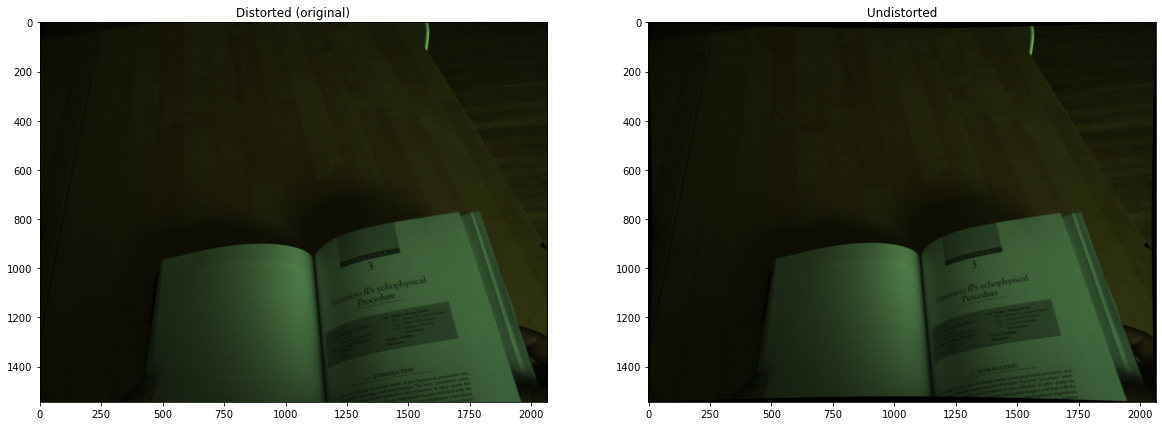

In [14]:
indoor_frame_folder = '/hmet_data_2/sm/2021_06_27/010/ximea/ximea/'
frame_number = 10
xim_frame = np.fliplr(np.flipud(btp.ximea_get_frame(frame_number, 1000, indoor_frame_folder)))
h,w = xim_frame.shape[:2]

newcammatrix, roi = cv2.getOptimalNewCameraMatrix(mtxloaded, distloaded, (w,h), 1, (w,h))
print('****')
xim_undistorted = cv2.undistort(xim_frame, mtxloaded, distloaded, None, newcammatrix)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(xim_frame)
plt.title('Distorted (original)')
plt.subplot(1,2,2)
plt.imshow(xim_undistorted)
plt.title('Undistorted')

### Outdoor

In [20]:
xim_yaml_outdoor = f'./calibration_info/calibration_distortion_ximea_outdoor.yaml'
with open(xim_yaml_outdoor, 'r') as stream:
		xim_yaml = yaml.unsafe_load(stream) #incompatibility with safe_load
		#intrinsics1 = np.array(xim_yaml['camera_matrix'],dtype=np.float32)
		#distortion1 = np.array([xim_yaml['dist_coeff']],dtype=np.float32)
mtxloaded = np.asarray(xim_yaml.get('camera_matrix'), dtype='float32')
distloaded = np.asarray(xim_yaml.get('dist_coeff'), dtype='float32')
xim_yaml

{'camera_matrix': [[1780.2811032738662, 0.0, 1029.6122072614028],
  [0.0, 1783.1714685257382, 786.6863303583722],
  [0.0, 0.0, 1.0]],
 'dist_coeff': [[-0.21411443840459854,
   0.3061510150541388,
   0.0001934507806108877,
   -0.0013179145543667696,
   -0.23246421005093082]]}

/hmet_data_2/sm/2021_06_27/060/ximea/ximea/frames_0_999.bin 10 (1544, 2064)
****


Text(0.5, 1.0, 'Undistorted')

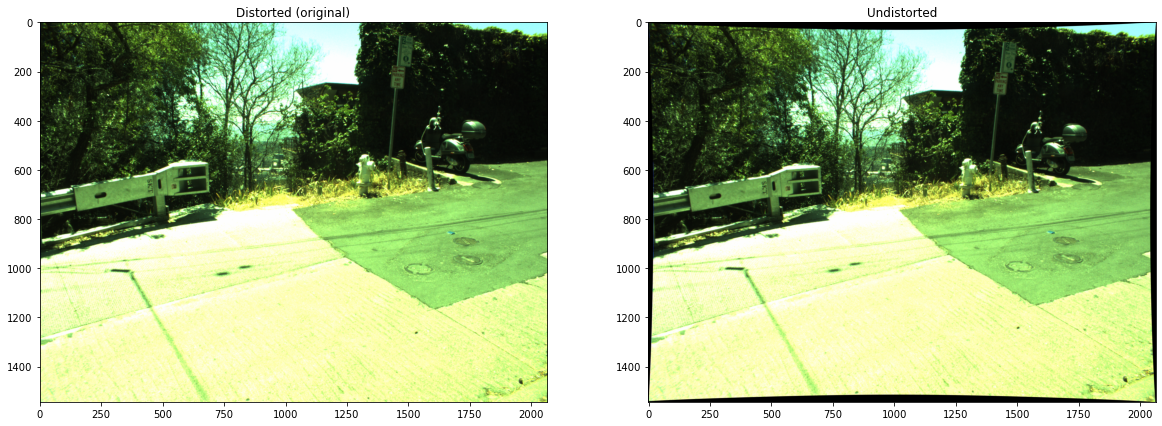

In [21]:
outdoor_frame_folder = '/hmet_data_2/sm/2021_06_27/060/ximea/ximea/'
frame_number = 10
xim_frame = np.fliplr(np.flipud(btp.ximea_get_frame(frame_number, 1000, outdoor_frame_folder)))
h,w = xim_frame.shape[:2]

newcammatrix, roi = cv2.getOptimalNewCameraMatrix(mtxloaded, distloaded, (w,h), 1, (w,h))
print('****')
xim_undistorted = cv2.undistort(xim_frame, mtxloaded, distloaded, None, newcammatrix)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(xim_frame)
plt.title('Distorted (original)')
plt.subplot(1,2,2)
plt.imshow(xim_undistorted)
plt.title('Undistorted')